# Homework, Week 21, Heather Leighton-Dick

## 1.	Create a basic API in Azure (as we did in class) that tells you how to access the different endpoints when you go to the home page. You should have the following endpoints:


### a.	A /all endpoint that displays all of the nobel.json data

https://nobelflask.azurewebsites.net/all

### b.	A /GET "year" endpoint that allows for you to pass in any year and shows you the Nobel prizes from that year. No need to create an HTML page for this, but you can if you want.

https://nobelflask.azurewebsites.net/all/year

### c.	A /add POST endpoint that lets you add additional data:

i.	You should use a basic HTML form, but you can also pass the data into the API url if you’re feeling ambitious. The latter may require use of a tool called Postman. First, make sure the data from the form is getting passed to python, and then work on appending it to the json file.
    
ii.	Make sure you see your updates when you go to /all

In [ ]:
#!/usr/bin/env python
#pip install flask
from flask import Flask, json, render_template, request
import os

#create instance of Flask app
app = Flask(__name__)

#decorator
@app.route("/")
def echo_hello():
    return """Nobel Prize Recipients Data Access:
            (1) Add "all" to the end of the URL above to see all recipients
            (2) Add "all/year" to see a list of recipients from that year -- example: all/2008 """

@app.route("/all")
def prize_data():
    json_url = os.path.join(app.static_folder,"","nobel.json")
    data_json = json.load(open(json_url))

    return render_template('index.html',data=data_json)

@app.route("/all/<year>", methods=['GET'])
def prize_year(year):
    json_url = os.path.join(app.static_folder,"","nobel.json")
    data_json = json.load(open(json_url))

    data = data_json['year']
    #print(data)
    year = request.view_args['year']

    output_data = [x for x in data if x['year']==year]
    return render_template('index.html',data=output_data)

@app.route("/all/<category>", methods=['POST'])
def prize_subject(category):
    return 'Welcome %s' % category

@app.route('/login',methods = ['POST', 'GET'])
def login():
    if request.method == 'POST':
        user = request.form['category']
        return redirect(url_for('prize_subject', category = user))
    else:
        user = request.args.get('category')
        return redirect(url_for('prize_subject', category = user))

if __name__ == "__main__":
    app.run(debug=True)

the above code is what I've written so far but haven't gotten the POST part to work yet

## 2.	What kind of API did you build? What types of APIs are there? Why are APIs important?

I built an open API, which has the goal of sharing data. The dataset I'm sharing is publically available and relatively small, and there is no password protection or other security measures.

There are four kinds of web APIs, depending on who will be using the app: open, partner, internal, and composite. Open APIs are the least protected and concerned with sharing data with a wide audience. Partner APIs are also available outside an organization but only to a limited number of other organization "partners"; security measures tend to be more restrictive than those for open APIs. Internal APIs are made for an organization to use but not to share outside of its own infrastructure; they are often used for data transfers. Composite APIs bring together other APIs and allow people to bundle together requests/calls and get one response from multiple servers (can be efficient in terms of server load).

APIs run on various architectures: REST (most common, transfers data from a server to a client; light and flexible), SOAP (transmits data across networks via standardized protocols; secure but rigid), and RPC (manages processes on a server; fairly rigid).

APIs allow us to connect web applications in ways that enhance data accessibility, whoever the user might be, and in that way, give us the ability to work more efficiently and securely.

### Intro to Cloud Computing certificate
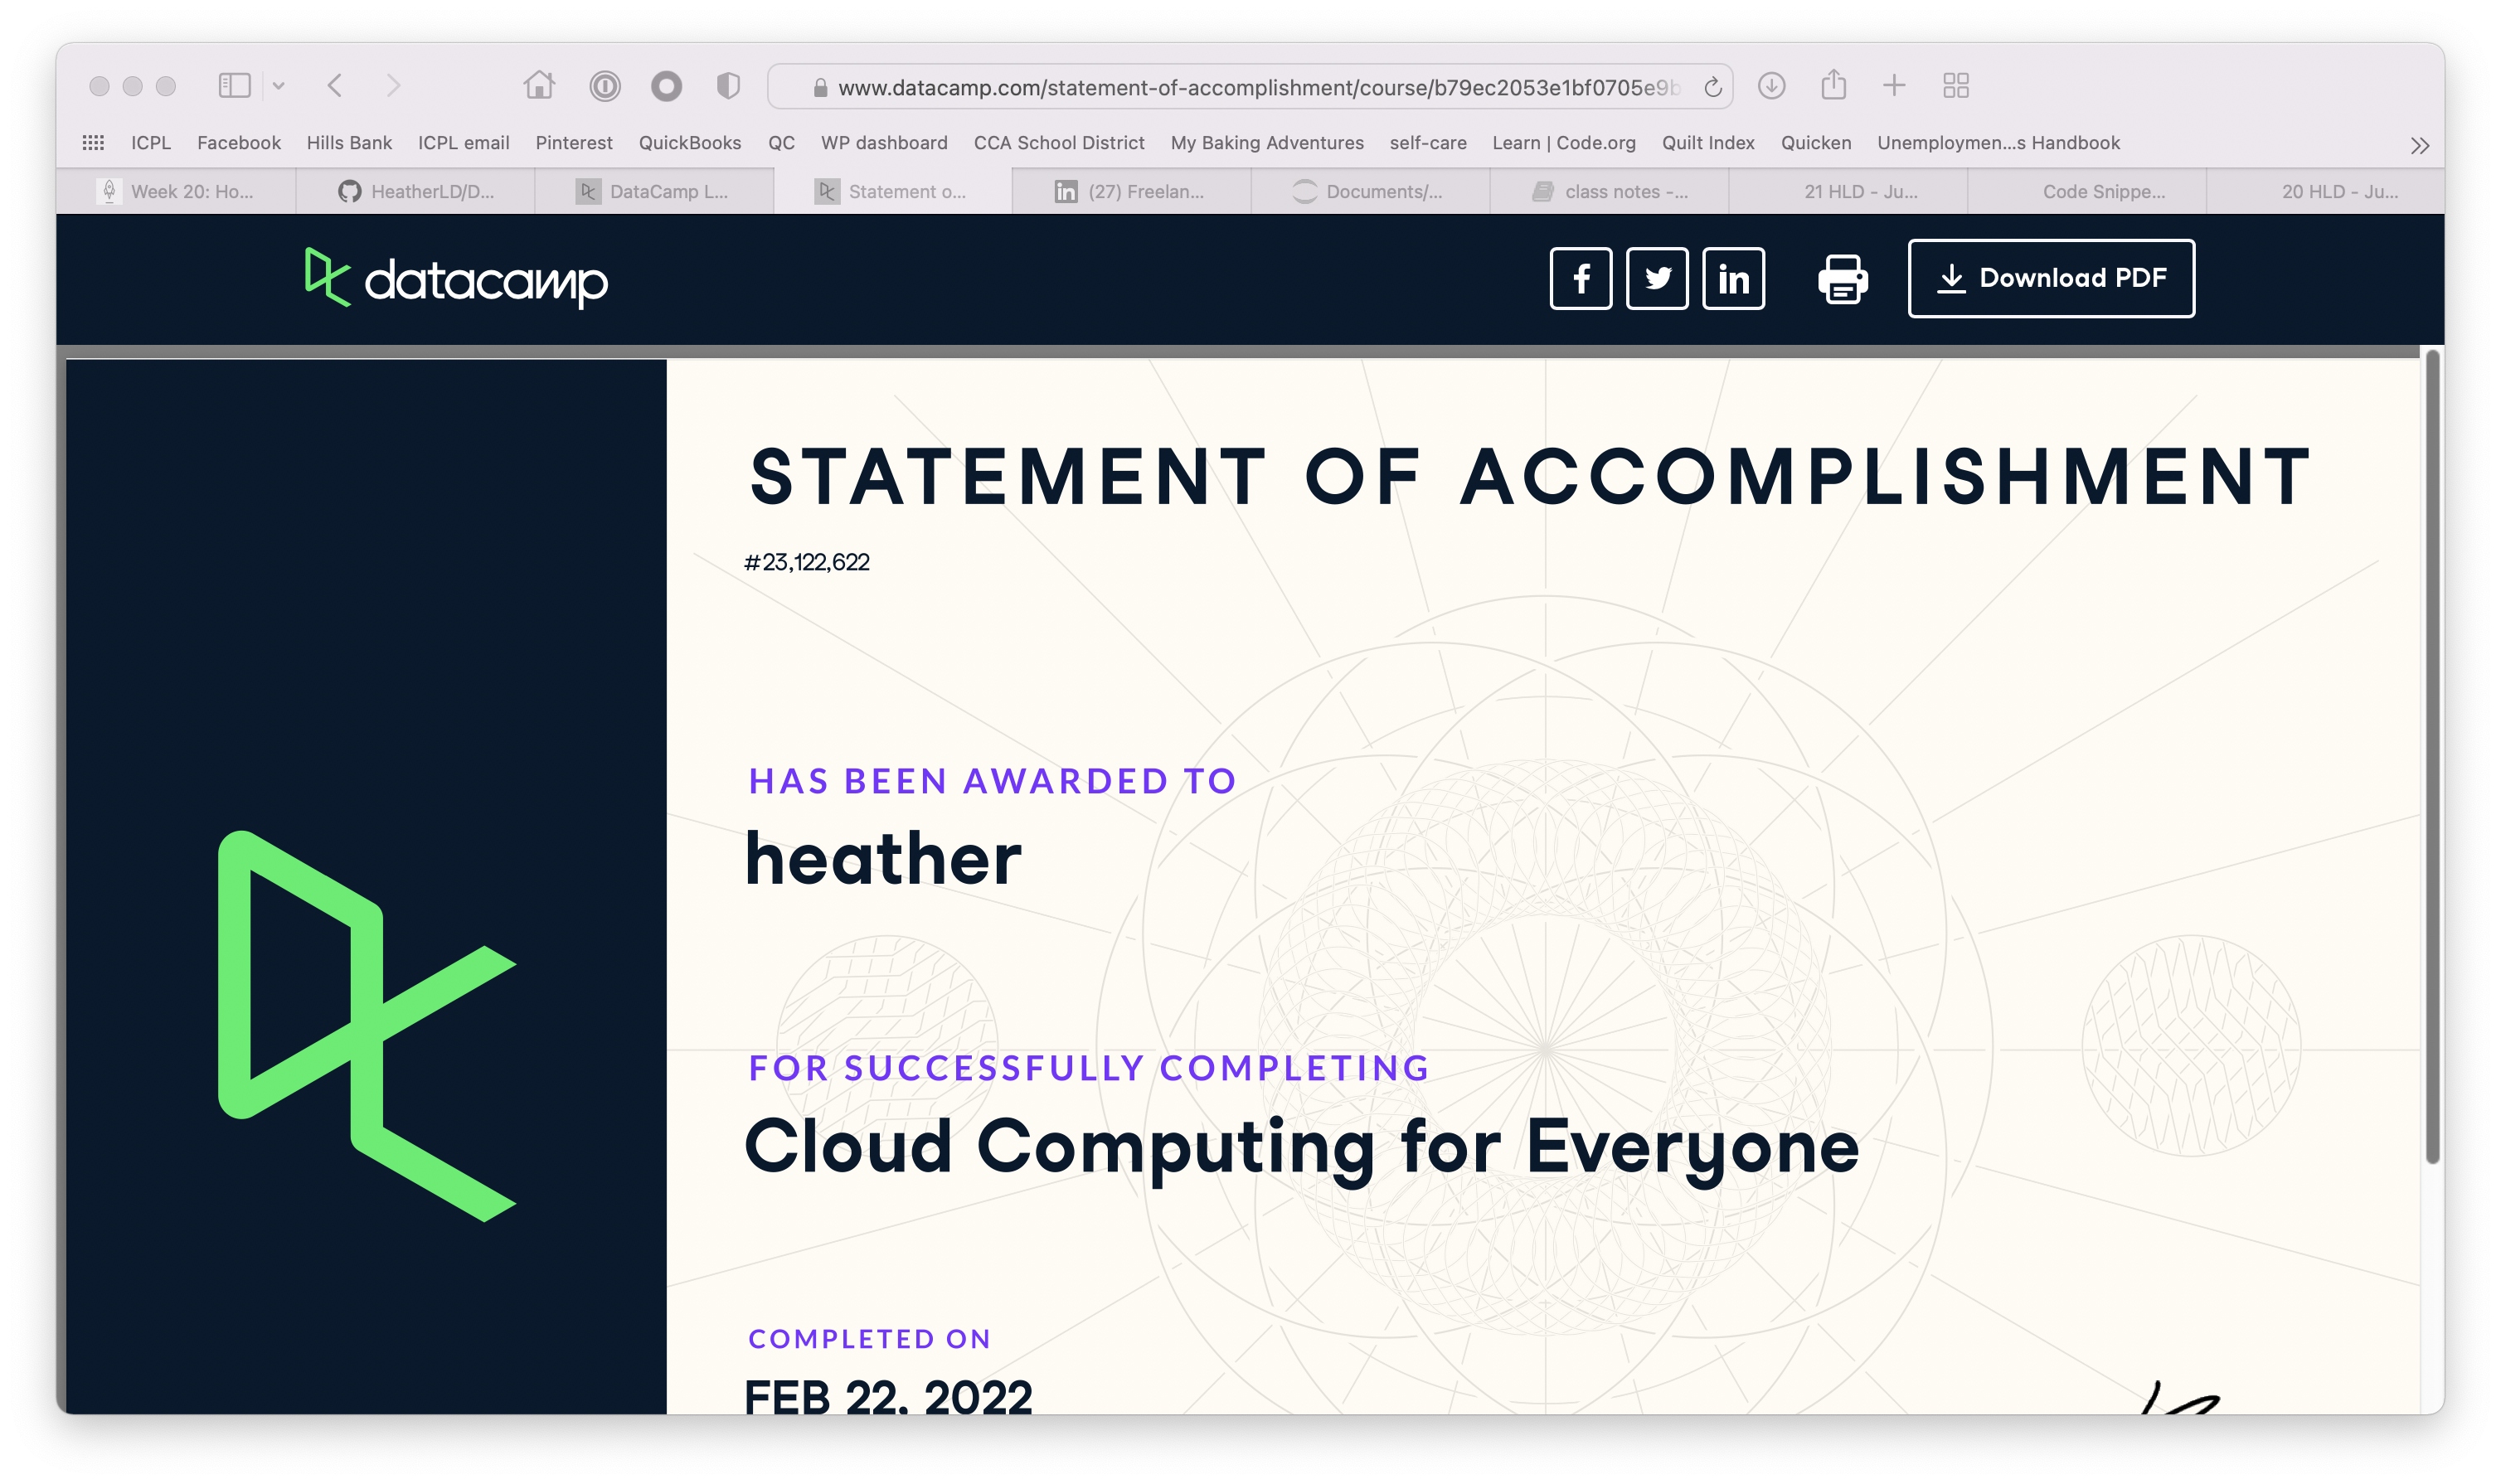